In [1]:
import pandas as pd
import quandl
import datetime

In [5]:
start = datetime.datetime(2021,1,1)
end = datetime.date.today()
import pandas_datareader.data as web
df = web.DataReader(name='AAPL', data_source='yahoo', start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709198
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453461
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041611
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664215
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952271


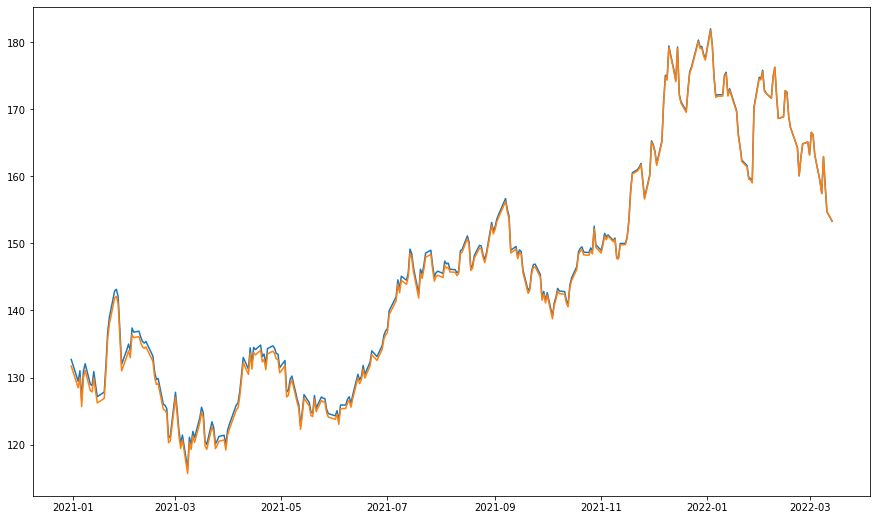

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.plot(df['Adj Close'])

In [14]:
#TOdo: Plot candle stick chart for this data

KeyError: "None of [Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close'], dtype='object')] are in the [columns]"